In [1]:
import pandas as pd
import lightkurve as lk
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bright.csv')
og = pd.read_csv("updated_table.csv")

/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


206.885171 49.31326


No data found for target "HIP 72220".
No data found for target "HIP 82673".
/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


235.387725431096 19.6704000293255


/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


169.782876265762 38.1855682583015


No data found for target "HIP 59819".
No data found for target "HIP 75761".
/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


219.709268706389 44.404499411527


No data found for target "HIP 82587".
/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


160.757839294511 26.3255639601947


/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


244.979758852716 39.7085829668576


No data found for target "HIP 59608".
/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


206.55643987125 41.0887440337041


/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


156.866850175184 41.6009924642612


/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


218.084286994415 26.6772870502233


No data found for target "HIP 83494".
/Users/ch/K2/repos/lightkurve/lightkurve/lightcurvefile.py:47: LightkurveWarning: `LightCurveFile.header` is deprecated, please use `LightCurveFile.get_header()` instead.
  LightkurveWarning)


179.529890927514 32.2739083832078


No data found for target "HIP 76291".


(0, 15)

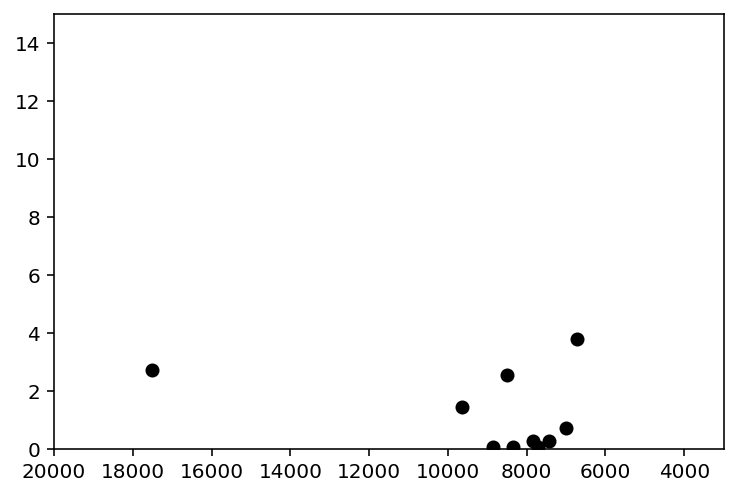

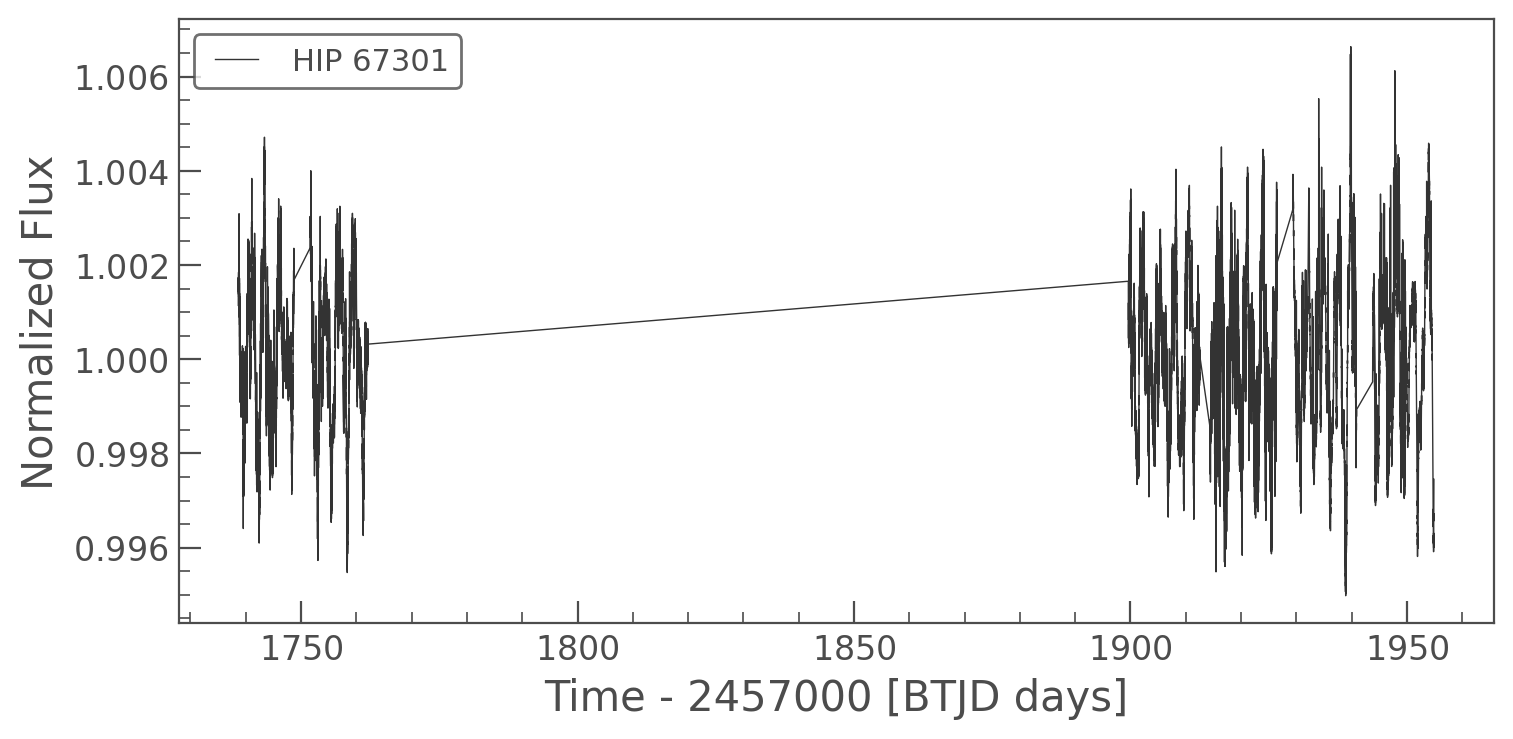

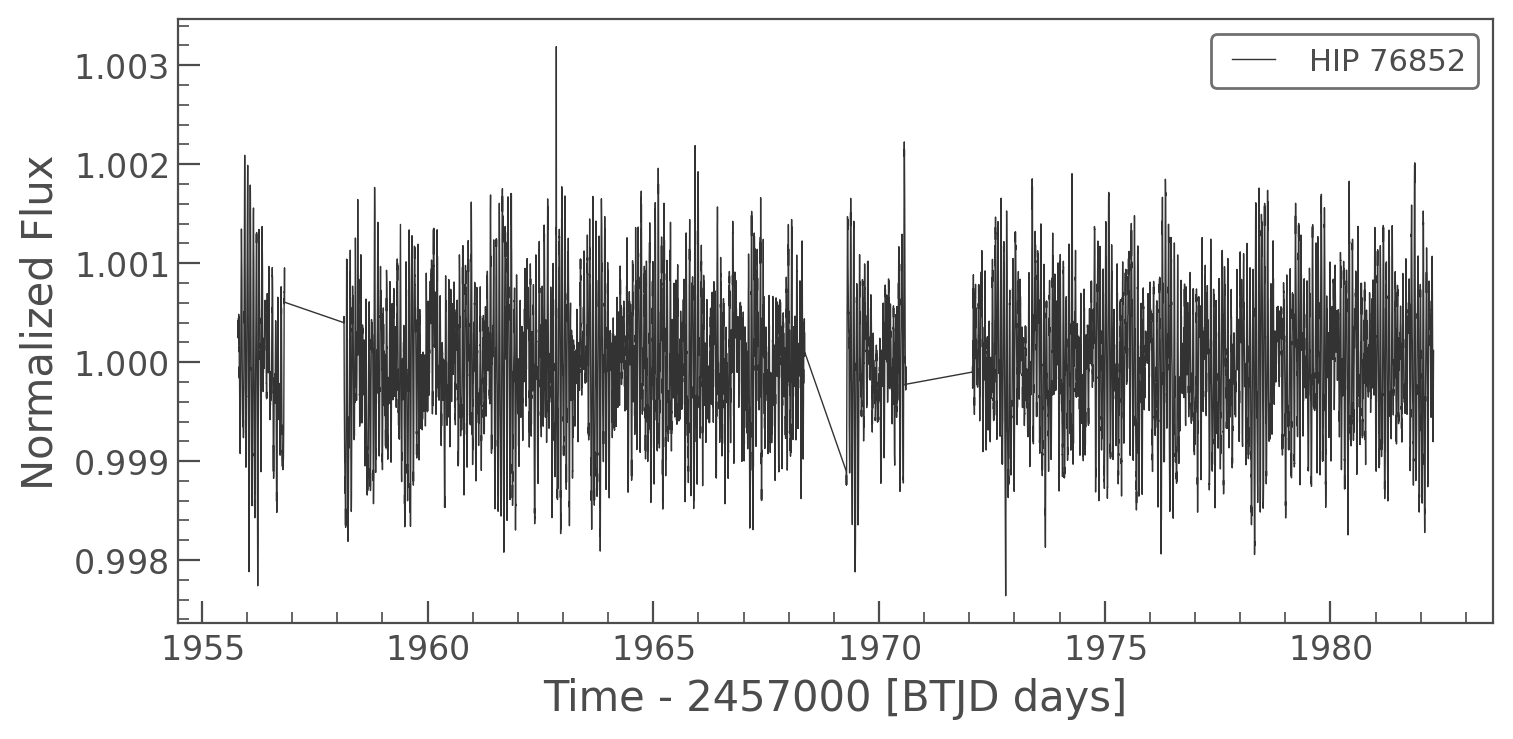

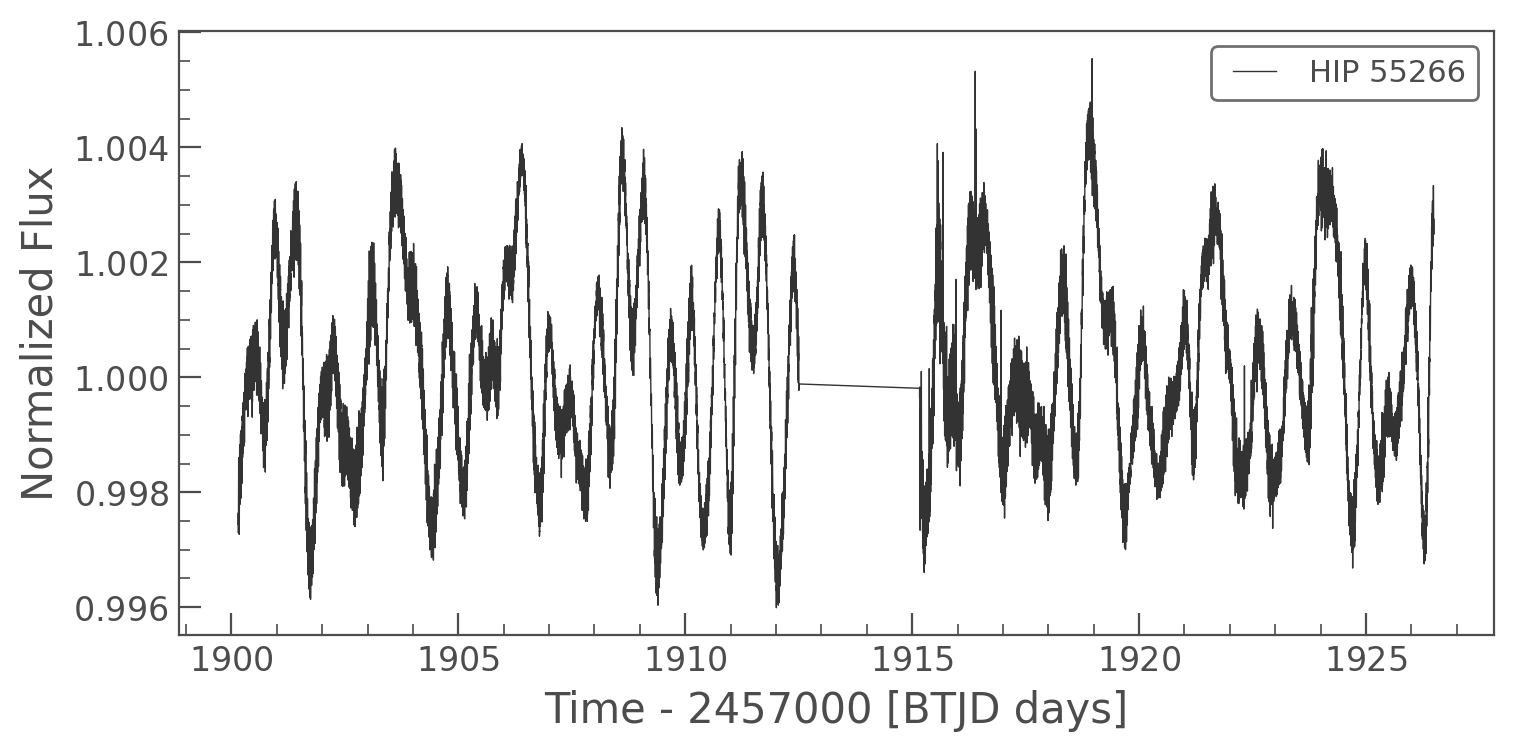

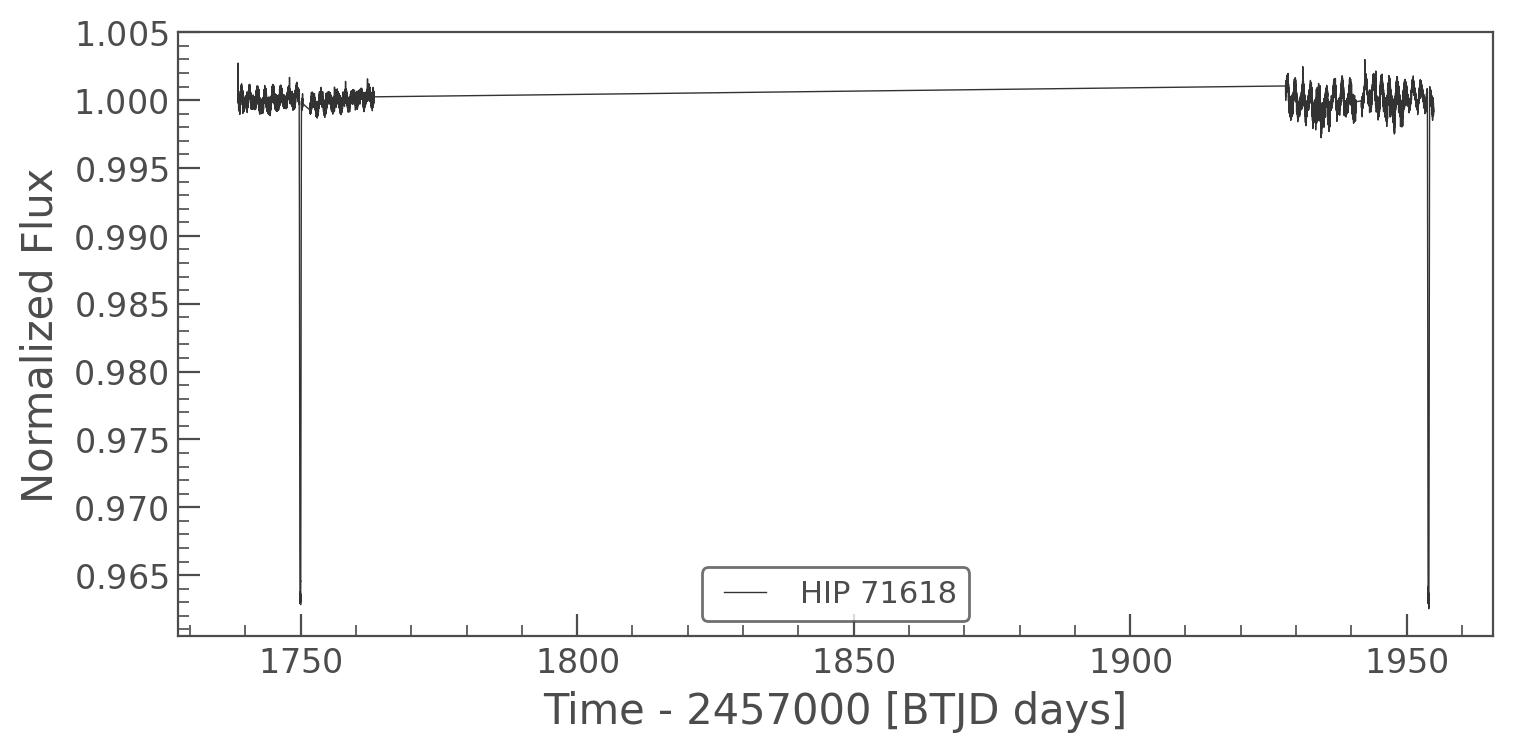

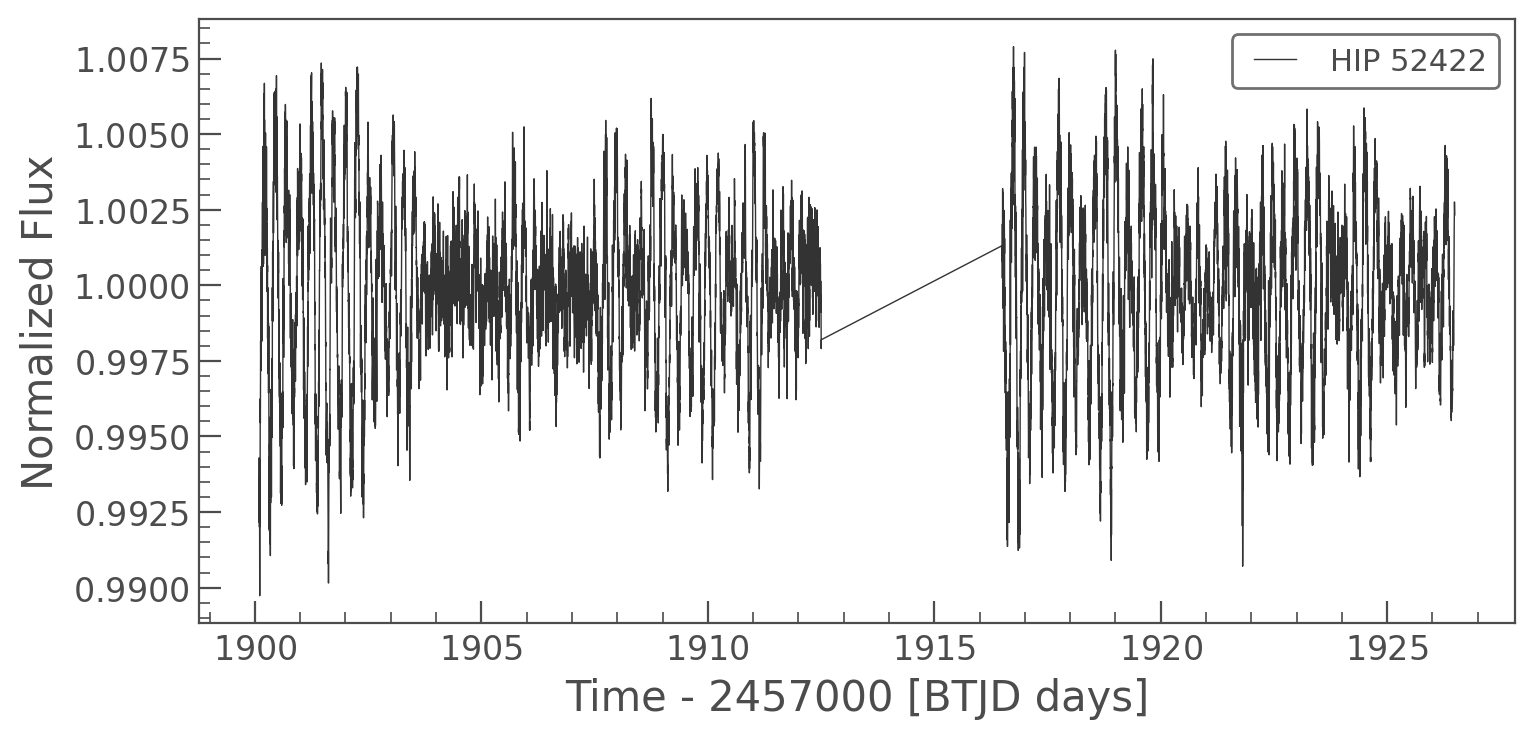

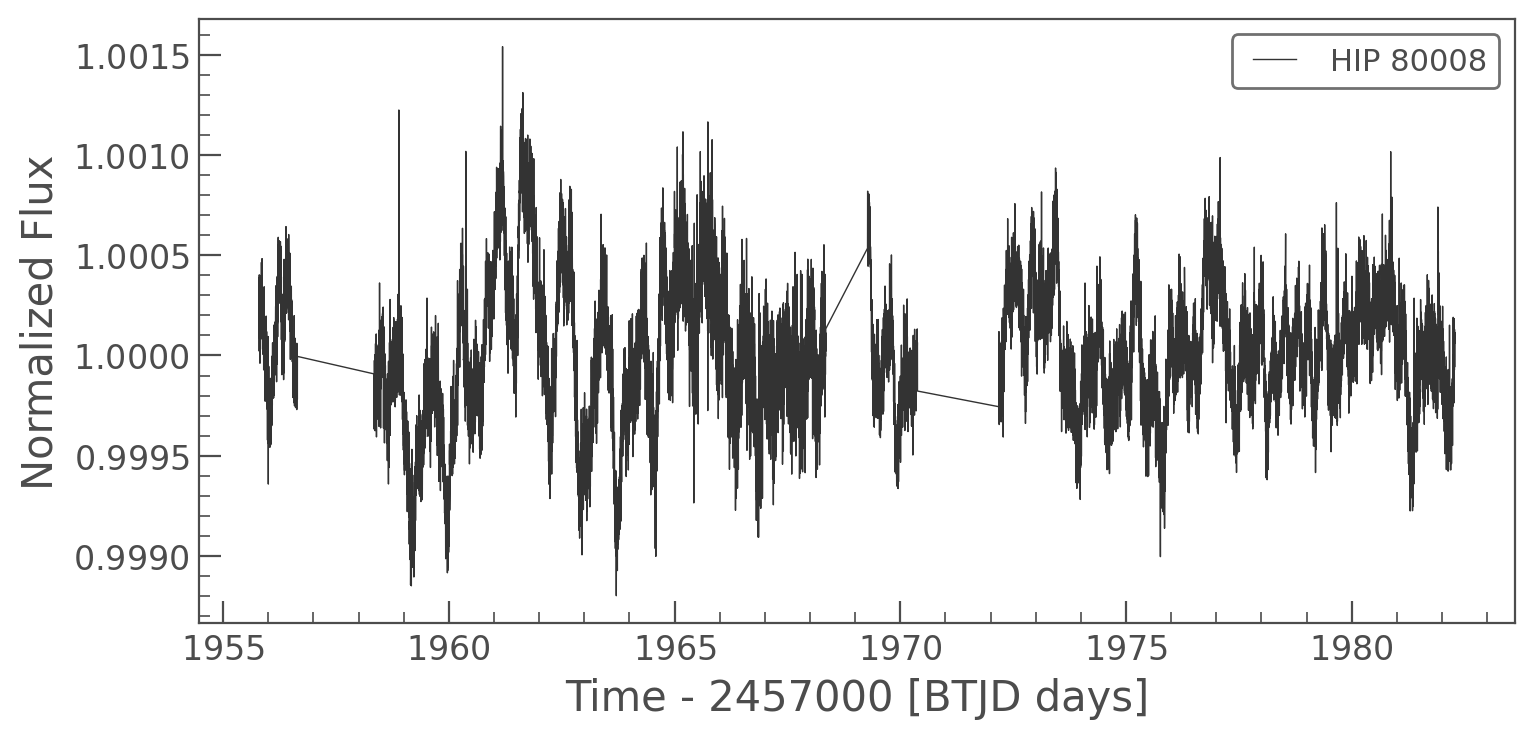

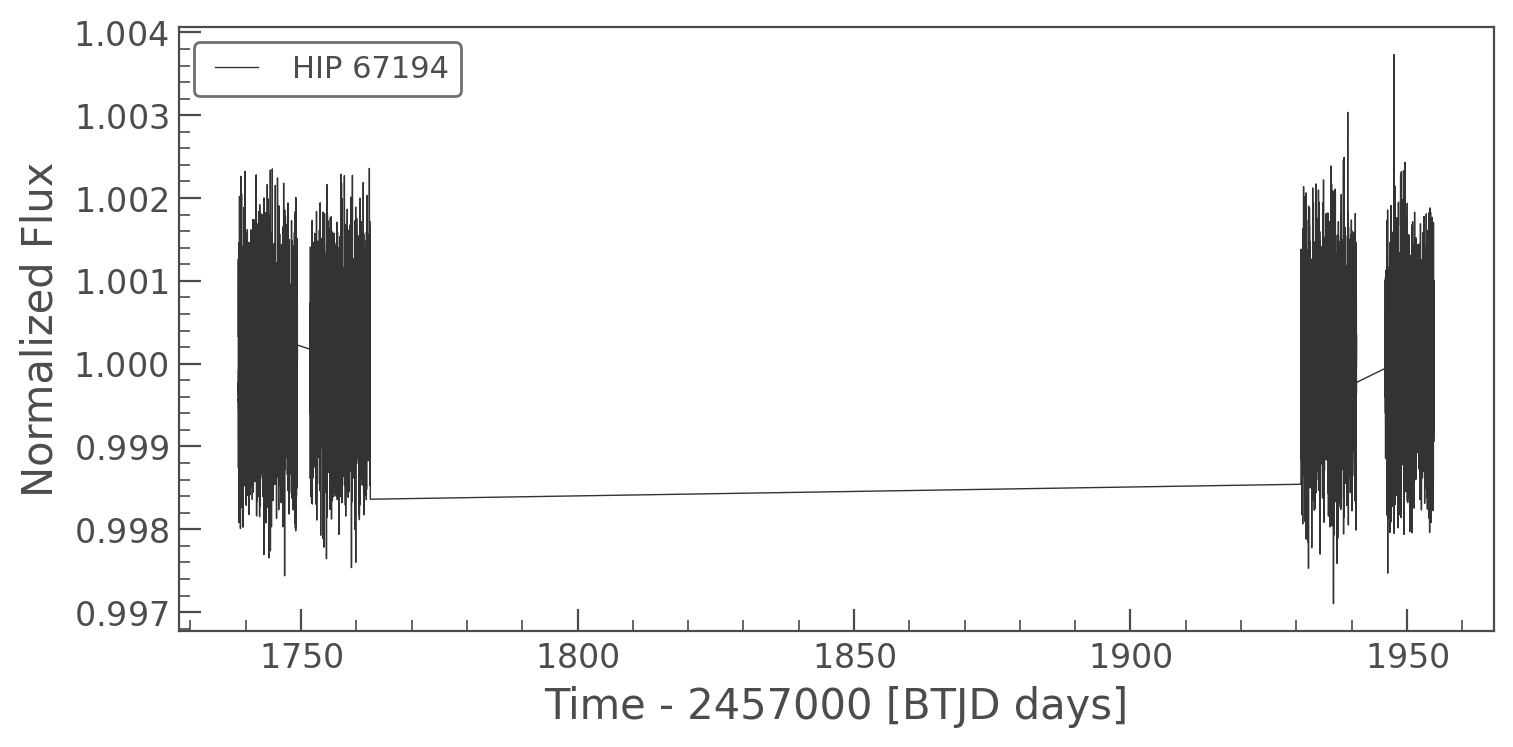

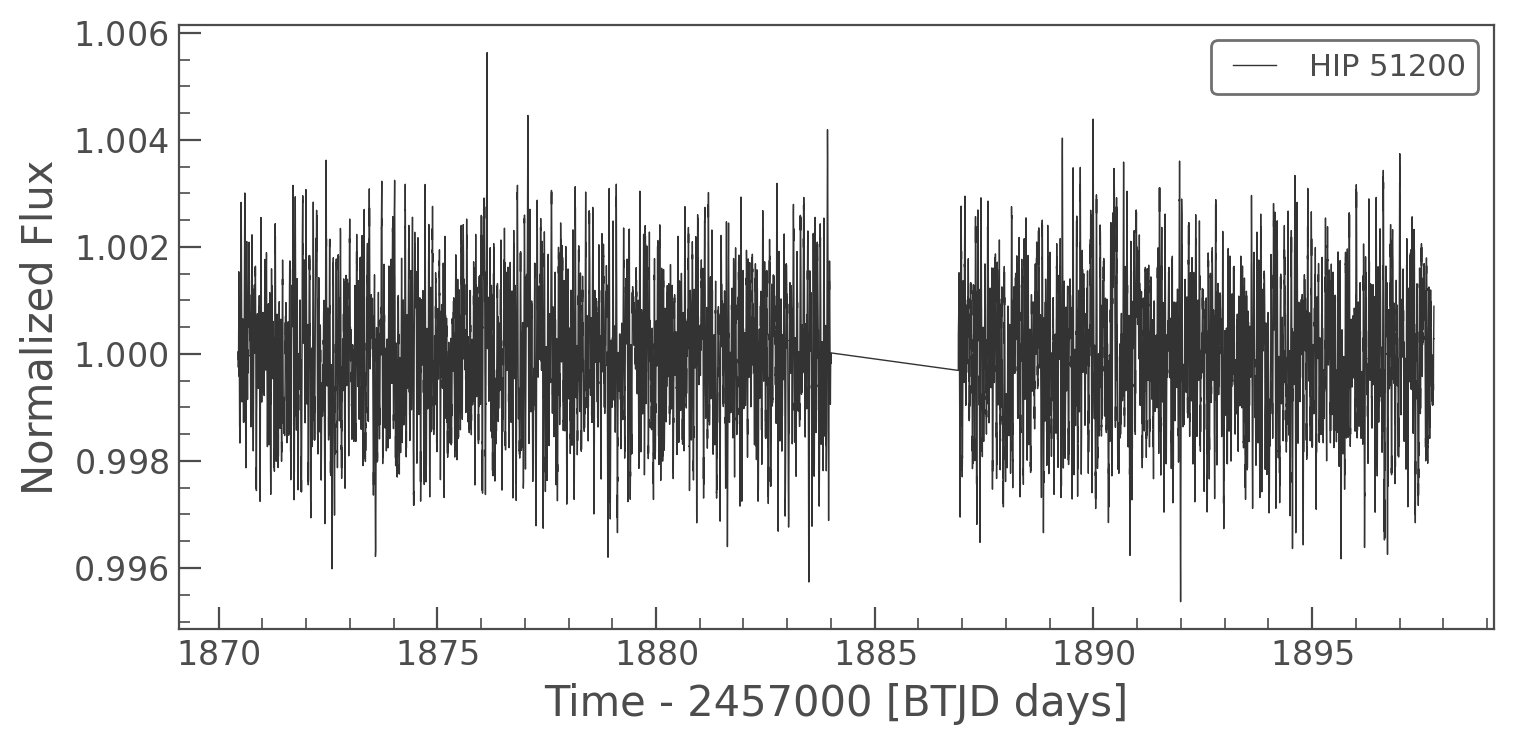

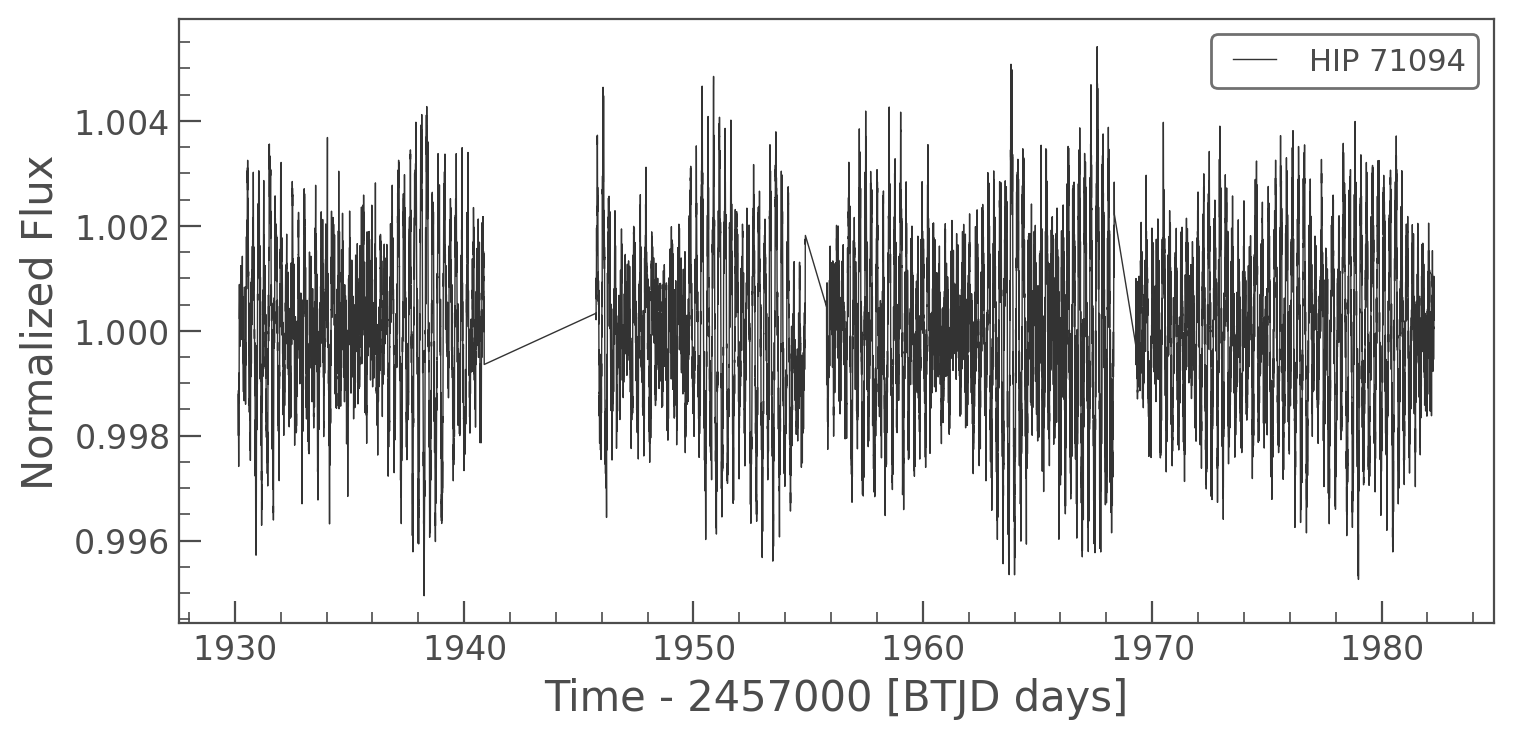

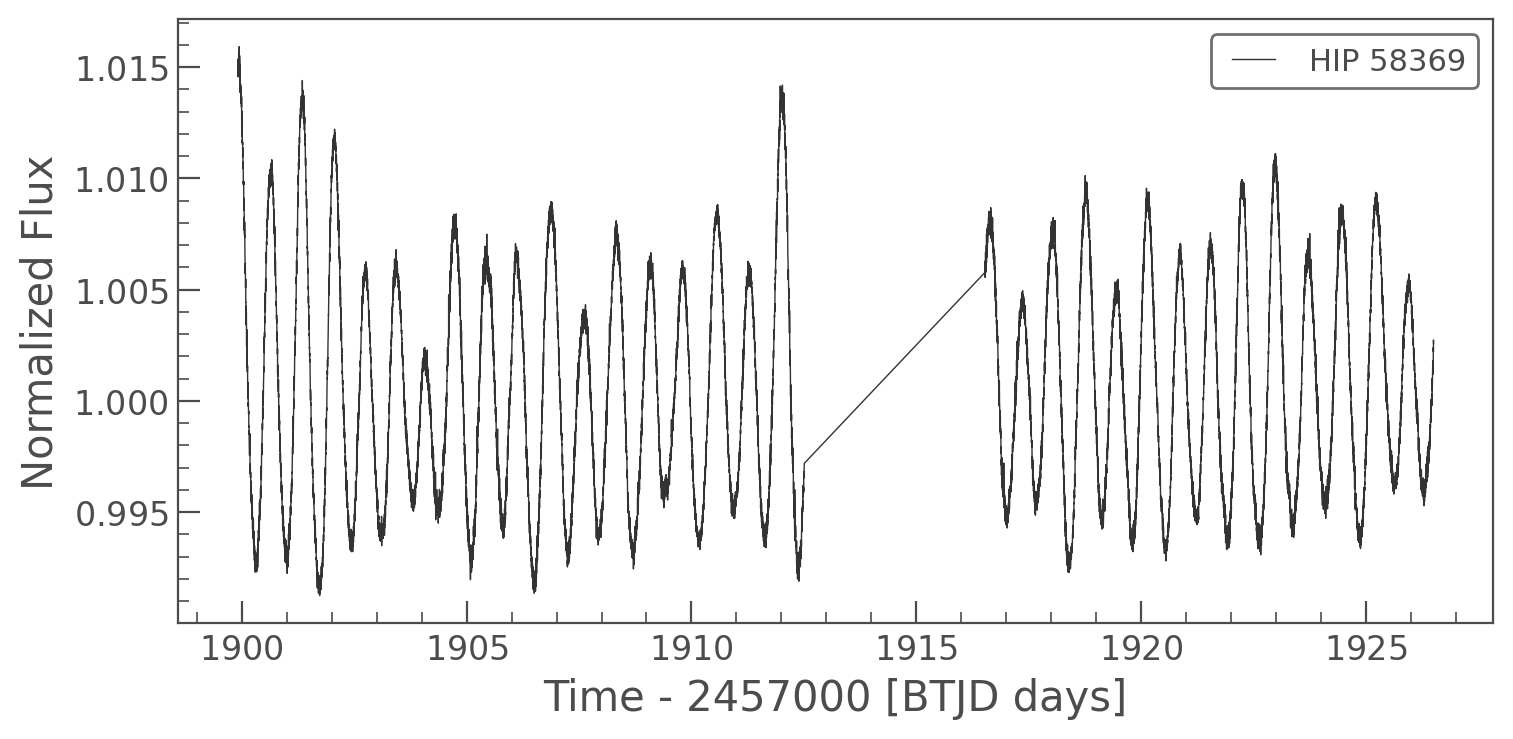

In [26]:
fig, ax = plt.subplots()
for idx in tqdm(range(len(df))):
    name = f'HIP {int(df.loc[idx].hip)}'
    if name in ['HIP 51056', 'HIP 61968', 'HIP 65241']:
        continue
    sr = lk.search_lightcurvefile(name)
    if len(sr) == 0:
        continue
    sr = sr[np.where(sr.target_name == sr.target_name[0])]
    lcs = sr.download_all()
    if name == 'HIP 71618':
        lc = lcs.SAP_FLUX.stitch().remove_nans()
    else:
        lc = lcs.PDCSAP_FLUX.stitch().remove_nans()
    lc.label = name
    lc.plot()
    per = lc.remove_outliers(10).to_periodogram()
    period = per.period_at_max_power.value
    if name == 'HIP 67301':
        teff = 17500
    else:
        teff = lcs[0].get_header()['TEFF']
    df.loc[idx, 'teff'] = teff
    df.loc[idx, 'period'] = period
    ax.scatter(teff, period, c='k')
    print(lc.ra, lc.dec)

ax.set_xlim(20000, 3000)
ax.set_ylim(0, 15)

In [25]:
lc.ra, lc.dec

(206.885171, 49.31326)

(-1, 15)

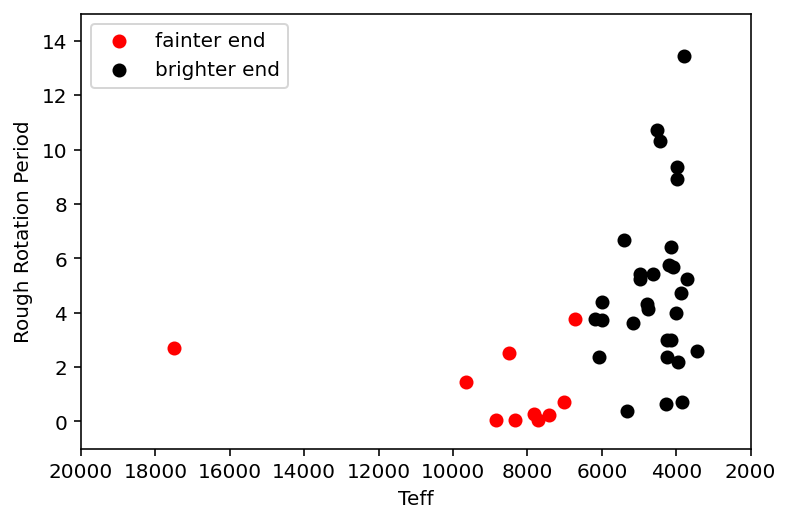

In [22]:
plt.scatter(df.teff, df.period, c='r', label='fainter end')
plt.scatter(og.teff_val, og.period, c='k', label='brighter end')
plt.xlabel('Teff')
plt.ylabel('Rough Rotation Period')
plt.legend()
plt.xlim(20000, 2000)
plt.ylim(-1, 15)

In [ ]:
idx

In [ ]:
df.loc[idx]

In [ ]:
lcs[0].SAP_FLUX.plot()

In [ ]:
lc = lcs.PDCSAP_FLUX.stitch().remove_nans()

In [ ]:
per = lc.remove_outliers(5).to_periodogram()

In [ ]:
lcs[0].PDCSAP_FLUX.plot()

In [ ]:
lc.fold(per.period_at_max_power.value).scatter()

In [ ]:
per.period_at_max_power

In [ ]:
lc.plot_river(per.period_at_max_power.value)

In [ ]:
per.period_at_max_power